In [12]:
# import PyTorch and its related packages
import torch as T
import pandas as pd
import hepytorch as hep
import matplotlib.pyplot as plt

In [13]:
num_inputs = 2
num_outputs = 1
num_examples = 10000
dtype = T.float

device = 'cuda' if T.cuda.is_available() else 'cpu'

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = T.randn(num_examples, num_inputs, device=device, dtype=dtype)
noise = .1 * T.randn(num_examples, device=device, dtype=dtype)
Y = (real_fn(X) + noise).view(-1, 1)

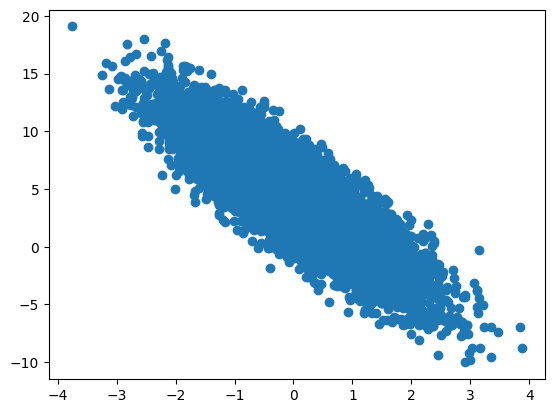

In [14]:
plt.scatter(X[:, 1].cpu().numpy(), Y.cpu().numpy())
plt.show()

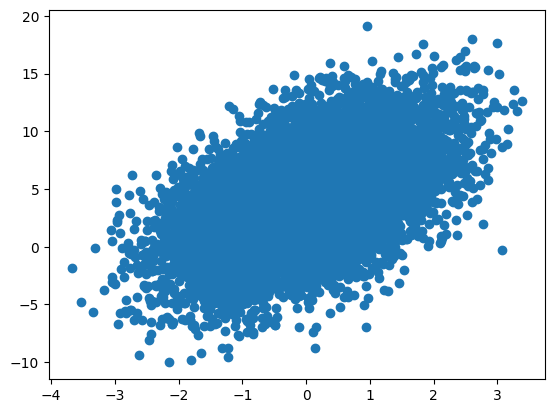

In [15]:
plt.scatter(X[:, 0].cpu().numpy(), Y.cpu().numpy())
plt.show()

In [16]:
# define dataframe for the dataset
x = X.cpu().numpy()
y = Y.cpu().numpy()
x.shape, y.shape
df = pd.DataFrame({'x1': x[:, 0], 'x2': x[:, 1], 'y': y[:, 0]})
df.to_csv('./data/linear_regression_data.csv', index=False)
df.head()

,x1,x2,y
0,2.154398,-0.267261,9.272833
1,-1.568917,0.542887,-0.747631
2,2.649014,-1.800747,15.545037
3,0.745037,-1.462745,10.625515
4,0.590315,-0.190627,6.017072


In [23]:
myHEP = hep.HEPTorch('./recipes/linear_regression.json')

In [24]:
result = myHEP.train()

Epoch 0, loss: 3.4439349462509155
Epoch 1, loss: 2.312127918958664
Epoch 2, loss: 1.552363349533081
Epoch 3, loss: 1.042442515516281
Epoch 4, loss: 0.7001462461590767
Epoch 5, loss: 0.47037867596149446
Epoch 6, loss: 0.3161335836470127
Epoch 7, loss: 0.212592235866189
Epoch 8, loss: 0.1430766098678112
Epoch 9, loss: 0.09640550969541073
Epoch 10, loss: 0.06506917904168368
Epoch 11, loss: 0.04402845034897328
Epoch 12, loss: 0.02990141471475363
Epoch 13, loss: 0.020415320099145175
Epoch 14, loss: 0.014044646868575364
Epoch 15, loss: 0.009767846337892115
Epoch 16, loss: 0.006894673549383879
Epoch 17, loss: 0.0049649327632971104
Epoch 18, loss: 0.0036686603422742335
Epoch 19, loss: 0.002798065638332628
Epoch 20, loss: 0.0022131582193076612
Epoch 21, loss: 0.001820283089345321
Epoch 22, loss: 0.001556333682546392
Epoch 23, loss: 0.0013789754325523973
Epoch 24, loss: 0.0012600296302465721
Epoch 25, loss: 0.0011800238700816407
Epoch 26, loss: 0.0011262385349487885
Epoch 27, loss: 0.00109007980

In [25]:
losses = result['losses']
print(losses)

[3.4439349462509155, 2.312127918958664, 1.552363349533081, 1.042442515516281, 0.7001462461590767, 0.47037867596149446, 0.3161335836470127, 0.212592235866189, 0.1430766098678112, 0.09640550969541073, 0.06506917904168368, 0.04402845034897328, 0.02990141471475363, 0.020415320099145175, 0.014044646868575364, 0.009767846337892115, 0.006894673549383879, 0.0049649327632971104, 0.0036686603422742335, 0.002798065638332628, 0.0022131582193076612, 0.001820283089345321, 0.001556333682546392, 0.0013789754325523973, 0.0012600296302465721, 0.0011800238700816407, 0.0011262385349487885, 0.0010900798071641475, 0.001065815204847604, 0.0010495062371948733]


In [26]:
params = myHEP.model.parameters()
print('The type of "params" is a ', type(params))

for name, param in myHEP.model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

The type of "params" is a  <class 'generator'>
dense_1.weight tensor([[ 1.9950, -3.3908]])
dense_1.bias tensor([4.1889])


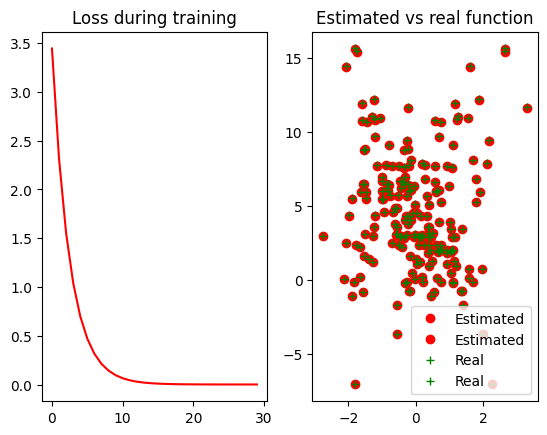

In [29]:
############################################
#    Script to plot the losses over time
############################################
def plot(model, losses, X, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size].cpu().detach().numpy(),
             model(X[:sample_size, :]).cpu().detach().numpy(), 'or', label='Estimated')
    fg2.plot(X[:sample_size].cpu().detach().numpy(),
             real_fn(X[:sample_size, :]).cpu().detach().numpy(), '+g', label='Real')
    fg2.legend()

    plt.show()

            
plot( myHEP.model, losses, X, 100)
